# IFT 4030 / 7030, Machine Learning for Signal Processing, Lab 7

In this lab we will cover material from lecture 7. You will be asked questions related to the material we covered during the lecture.

This lab counts 1% towards your final grade. Each question will be graded in a binary way. If the code works, and follows the requirements you will get full credit, if not no credit will be given. If you are above 50%, you get full points for the whole lab, if below, you will only leave with what you learn. (if you are below 50%, you will get 0% towards your final grade)

This is supposed to individual work. So you are not supposed to collaborate with other students, or copy other people's code. It's okay to talk with others for ideas, but you are supposed write your code individually.

You can use pytorch or numpy. But I recommend that you use pytorch as it will serve you better in the rest of the class!

If you do not have a google (gmail) account, you will not be able run the cells. So get one! Also, make sure you create a local copy, so that you can save your work, and then you can upload your work on teams. After you are happy with your work, upload your work on Lab 7 in teams.

Please do not use any LLM assistance when replying your questions!

Have a nice lab!

-----------------------

Dans ce laboratoire, nous couvrirons le matériel du cours 7. Questions vous seront posées liées au matériel que nous avons couvert pendant le cours.

Ce laboratoire compte 1 % dans votre note finale. Chaque question sera notée de manière binaire. Si le code fonctionne et respecte les exigences, vous obtiendrez l'intégralité du crédit, sinon aucun crédit ne sera accordé. Si vous êtes au dessus de 50%, vous obtenez la totalité des points pour l'ensemble du laboratoire, si en dessous, vous ne repartirez qu'avec ce que vous avez appris. (Si vous êtes en dessous de 50%, vous obtiendrez 0% vers votre note finale)

Ceci est censé être un travail individuel. Vous n’êtes donc pas censé collaborer avec d’autres étudiants ni copier le code d’autres personnes. C'est bien de discuter avec les autres pour trouver des idées, mais vous êtes censé écrire votre code individuellement.

Vous pouvez utiliser pytorch ou numpy. Mais je vous recommande d'utiliser pytorch car il vous servira mieux dans le reste de la classe!

Si vous n'avez pas de compte google (gmail), vous ne pourrez pas exécuter les cellules. Alors obtenez-en un! Assurez-vous également de créer une copie locale, afin de pouvoir enregistrer votre travail, puis de télécharger votre travail sur Teams. Une fois que vous êtes satisfait de votre travail, téléchargez votre travail sur Lab 7 en teams.

SVP pas d'aide des LLMs quand vous remplissez la réponse!

Je vous souhaite un beau laboratoire!

# Lab 7: A neural network classifier for Spoken Digits

In this colab, we will train a classifier on then spoken digit dataset. Let's first install some packages.

This task is the audio analog of the famous MNIST classification task.
We have 10 classes for 10 digits that are spoken.

We expect you to design a neural network classifier that would output the class label given the recording of a digit.

You are allowed to use pytorch and torchaudio.

---------------------------

# Lab 7 : Un classificateur de réseau neuronal pour les chiffres parlés

Dans ce laboratoire, nous entraînerons un classificateur sur un ensemble de données de chiffres parlés. Commençons par installer quelques packages.

Cette tâche est l’analogue audio de la célèbre tâche de classification MNIST.
Nous avons 10 classes pour 10 chiffres parlés.

Nous attendons de vous que vous conceviez un classificateur de réseau neuronal qui produirait l'étiquette de classe compte tenu de l'enregistrement d'un chiffre.

Vous êtes autorisé à utiliser pytorch et torchaudio.



In [3]:
!pip install matplotlib --user
!pip install torch --user
!pip install hub[audio] --user
!pip install deeplake[audio] --user


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached hub-3.0.1-py3-none-any.whl.metadata (389 bytes)
  Using cached deeplake-3.9.27-py3-none-any.whl
  Using cached pillow-10.4.0-cp311-cp311-win_amd64.whl.metadata (9.3 kB)
  Using cached boto3-1.35.50-py3-none-any.whl.metadata (6.7 kB)
  Using cached pathos-0.3.3-py3-none-any.whl.metadata (11 kB)
  Using cached humbug-0.3.2-py3-none-any.whl.metadata (6.8 kB)
  Using cached lz4-4.3.3-cp311-cp311-win_amd64.whl.metadata (3.8 kB)
  Using cached botocore-1.35.50-py3-none-any.whl.metadata (5.7 kB)
  Using cached jmespath-1.0.1-py3-none-any.whl.metadata (7.6 kB)
  Using cached s3transfer-0.10.3-py3-none-any.whl.metadata (1.7 kB)
  Using cached dill-0.3.9-py3-none-any.whl.metadata (10 kB)
  Using cached multiprocess-0.70.17-py311-none-any.whl.metadata (7.2 kB)
Using cached hub-3.0.1-py3-none-any.whl (1.4 kB)
Using cached humbug-0.3.2-py3-none-any.whl (15 kB)
Using cached pillow-10.4.0-cp311-cp311-win_amd64.whl (2.6 MB)
Using cached boto3-1.35.50-py3-none-any.whl (139 kB)
Using cach

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 2.15.0 requires dill<0.3.8,>=0.3.0, but you have dill 0.3.9 which is incompatible.
mediapipe 0.10.8 requires protobuf<4,>=3.11, but you have protobuf 4.25.3 which is incompatible.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached av-13.1.0-cp311-cp311-win_amd64.whl.metadata (4.6 kB)
Using cached av-13.1.0-cp311-cp311-win_amd64.whl (25.8 MB)



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Dataset splitting stuff

import hub
import torch
import numpy as np
import random
ds = hub.load("hub://activeloop/spoken_mnist")
import matplotlib.pyplot as plt
from IPython.display import Audio

N_train = 2500

# shuffle the dataset
lst_shfl = list(range(3000))
random.shuffle(lst_shfl)
ds = ds[lst_shfl]

# split the dataset
ds_train = ds[:N_train]
ds_test = ds[N_train:]

data = ds_train[0]['audio'].data()['value']
Audio(data.squeeze(), rate=8000)

# for the next sections
data = torch.from_numpy(data).transpose(0, 1)


C:\Users\PC\AppData\Roaming\Python\Python311\site-packages\deeplake\util\check_latest_version.py:32: UserWarning: A newer version of deeplake (4.0.0) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(
-

Opening dataset in read-only mode as you don't have write permissions.


-

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/spoken_mnist



-

hub://activeloop/spoken_mnist loaded successfully.



# Q1: Data visualization (10pt)

Here we will plot the variable `data` we have defined above as a raw waveform, as a magnitude spectrogram.

# Q1: Visualisation des données (10pt)

Ici, nous allons tracer la variable `data` que nous avons définie ci-dessus sous forme d'onde brute, sous forme de spectrogramme de magnitude.

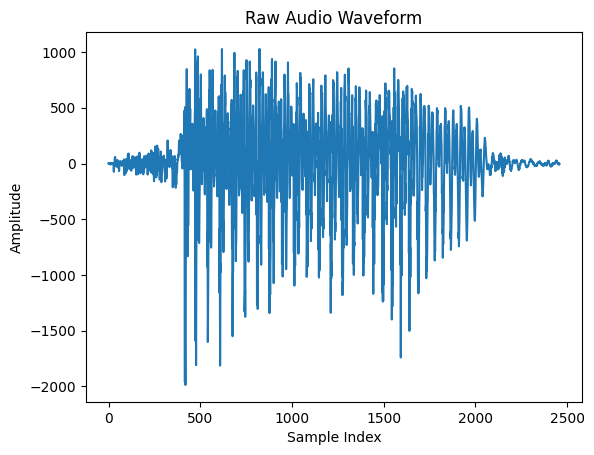

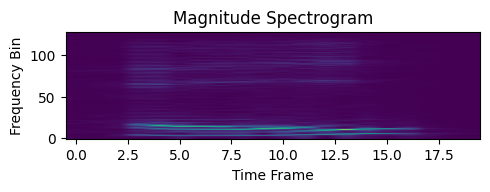

In [14]:
# FILL IN HERE -- visualize some data

# TASK 1: plot the raw audio
plt.figure()
plt.plot(data[0].numpy())
plt.title("Raw Audio Waveform")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")

# TASK 2: calculate the magnitude spectrogram of the audio signal
# (use torch.STFT function)
spectrogram = torch.stft(data, n_fft=256, hop_length=128, return_complex=True)
magnitude_spectrogram = torch.abs(spectrogram)
# TASK 3: plot this magnitude spectrogram using matplotlib
plt.figure(figsize=[5, 10], dpi=100)
plt.imshow(magnitude_spectrogram[0].numpy(), aspect=0.04, origin='lower')
plt.title("Magnitude Spectrogram")
plt.xlabel("Time Frame")
plt.ylabel("Frequency Bin")
plt.tight_layout()


# Q2 Define a time domain network (30 pt)

Here our goal is to define a time domain convolutional neural network to classify variable length sequences.

You can follow the pipeline described in slide 40 of https://ycemsubakan.github.io/class_slides2024/mlsp_2024_week7.pdf (You can change the number of convolutional layers if you want but 3 layers should work fine) -- This pipeline is a guideline, of course if you have better ideas, you are more than welcome to explore them, you just need to make sure that your network works with variable length inputs.

For convolutional layers use `nn.Conv1d` with a stride value of 4, and kernel size 8. Note that these values are suggested values, and you can change if you wish.

After the convolutional layers simply calculate an average over the time axis.

Use a linear layer with `nn.Linear` after the pooling to obtain a 10 dimensional output (we have 10 possible classes). More specifically the test you have below should return $B \times 10$, with $B=1$.

---------------------

# Q2 Définir un réseau temporel (30 pt)

Ici, notre objectif est de définir un réseau neuronal convolutif dans le domaine temporel pour classer des séquences de longueur variable.

Vous pouvez suivre le pipeline décrit dans la diapositive 40 de https://ycemsubakan.github.io/class_slides2024/mlsp_2024_week7.pdf (vous pouvez modifier le nombre de couches convolutives si vous le souhaitez mais 3 couches devraient fonctionner correctement) -- Ce pipeline est une ligne directrice, bien sûr, si vous avez de meilleures idées, vous êtes plus que bienvenu pour les explorer, il vous suffit de vous assurer que votre réseau fonctionne avec des entrées de longueur variable.

Pour les couches convolutives, utilisez `nn.Conv1d` avec une valeur de foulée de 4 et une taille de noyau de 8. Notez que ces valeurs sont des valeurs suggérées et que vous pouvez les modifier si vous le souhaitez.

Après les couches convolutives, calculez simplement une moyenne sur l’axe du temps.

Utilisez une couche linéaire avec `nn.Linear` après la mise en commun pour obtenir une sortie en 10 dimensions (nous avons 10 classes possibles). Plus précisément, le test que vous avez ci-dessous devrait renvoyer $B \times 10$, avec $B=1$.

In [15]:
import torch.nn as nn
import torch.nn.functional as F

# FILL IN HERE: Define your network and forward pass.
class Net(nn.Module):
    def __init__(self, num_filters):
        super().__init__()
        # TASK 1: define a network here that would work with time domain inputs
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=num_filters, kernel_size=8, stride=4)
        self.conv2 = nn.Conv1d(in_channels=num_filters, out_channels=num_filters*2, kernel_size=8, stride=4)
        self.conv3 = nn.Conv1d(in_channels=num_filters*2, out_channels=num_filters*4, kernel_size=8, stride=4)
        self.fc = nn.Linear(num_filters*4, 10)
    def forward(self, x):
        # TASK 2: define a forward pass here that would work with time domain inputs -- the output should be a 10-way classification vector
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = x.mean(dim=2)   # pooling over t
        x = self.fc(x)
        return x

# instantiate the net
net = Net(num_filters=128)

# see if we get the correct output shape
y = net.forward(torch.from_numpy(ds_test[0:1]['audio'].numpy()).permute(0, 2, 1).float())
print(y.shape)   # see if you get the expected shape


# define the optimizer and the loss function
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.0005)



torch.Size([1, 10])


# Q3: Complete the training loop (60pt)

Now, complete the training loop, train the model and obtain a test accuracy greater than 80%. The missing parts are highlighted in the comments.

Note that the first epoch will be slower than the rest because of the hub loader we are using in this lab.

-----------------------

# Q3 : Complétez la boucle d'entraînement (60pt)

Maintenant, complétez la boucle d'entraînement, entraînez le modèle et obtenez une précision de test supérieure à 80 %. Les parties manquantes sont mises en évidence dans les commentaires.

Notez que la première époque sera plus lente que les autres en raison du chargeur hub que nous utilisons dans ce labo.

In [17]:
# Now we need to define the training loop

for epoch in range(10):  # loop over the dataset multiple times (you might need more than 10 epochs)

    running_loss = 0.0
    for i, data in enumerate(ds_train):

        #  get the inputs and labels to have raw audio and labels from data in correct precision and shape
        inputs, labels = torch.from_numpy(data['audio'].data()['value']).float(), torch.from_numpy(data['labels'].data()['value'].astype('long')).reshape(-1)
        # normalize the range of the values
        inputs = inputs / inputs.abs().max()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        # FILL IN HERE: TASK 1: get the network output in the correct shape
        outputs = net(inputs.T.unsqueeze(0))
        loss = criterion(outputs, labels.long())
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 0:    # print every 200 data items
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 200:.3f}')
            running_loss = 0.0

print('Finished Training')


[1,     1] loss: 0.012
[1,   201] loss: 2.310
[1,   401] loss: 2.272
[1,   601] loss: 2.130
[1,   801] loss: 2.168
[1,  1001] loss: 1.950
[1,  1201] loss: 1.812
[1,  1401] loss: 1.744
[1,  1601] loss: 1.669
[1,  1801] loss: 1.439
[1,  2001] loss: 1.528
[1,  2201] loss: 1.516
[1,  2401] loss: 1.403
[2,     1] loss: 0.009
[2,   201] loss: 1.413
[2,   401] loss: 1.245
[2,   601] loss: 1.370
[2,   801] loss: 1.414
[2,  1001] loss: 1.276
[2,  1201] loss: 1.289
[2,  1401] loss: 1.178
[2,  1601] loss: 1.267
[2,  1801] loss: 0.997
[2,  2001] loss: 1.083
[2,  2201] loss: 1.171
[2,  2401] loss: 1.057
[3,     1] loss: 0.007
[3,   201] loss: 1.073
[3,   401] loss: 0.908
[3,   601] loss: 1.040
[3,   801] loss: 1.093
[3,  1001] loss: 0.978
[3,  1201] loss: 0.903
[3,  1401] loss: 0.813
[3,  1601] loss: 0.943
[3,  1801] loss: 0.719
[3,  2001] loss: 0.763
[3,  2201] loss: 0.894
[3,  2401] loss: 0.714
[4,     1] loss: 0.009
[4,   201] loss: 0.789
[4,   401] loss: 0.647
[4,   601] loss: 0.770
[4,   801] 

The classification accuracy you are getting is =  89.80000615119934 percent


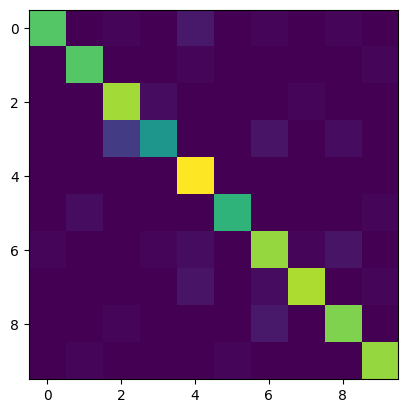

In [18]:
# test on the test set

test_set = ds_test

conf_mat = torch.zeros(10, 10)
for sample in test_set:

  inputs, labels = torch.from_numpy(sample['audio'].data()['value']).float(), sample['labels'].data()['value'].item()

  inputs = inputs / inputs.abs().max()

  outputs = net(inputs.t().unsqueeze(0))
  pred = outputs.squeeze().argmax().item()

  conf_mat[labels, pred] = conf_mat[labels, pred] + 1

acc = np.diag(conf_mat).sum() / conf_mat.sum()

plt.imshow(conf_mat)
print('The classification accuracy you are getting is = ', acc.item()*100, 'percent')
